In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import os
path="/content/gdrive/My Drive/nlp_assignment2"
os.chdir(path)

In [1]:
import keras
import nltk
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
url = 'https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv'
df = pd.read_csv(url, sep='\t')

In [3]:
df.head(3)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2


#split data and create dataframe

In [0]:
X=df['Phrase']
Y=df['Sentiment']
x_train,x_test,y_train,y_test=train_test_split(X, Y, 
                                               test_size=0.3, random_state=2003)

In [0]:
print('data size before cleaning\n')
print('x_train:', x_train.shape, '\n', 
      'x_test:', x_test.shape,'\n', 
      'y_train:', y_train.shape, '\n', 
      'y_test:', y_test.shape, '\n')

data size before cleaning

x_train: (109242,) 
 x_test: (46818,) 
 y_train: (109242,) 
 y_test: (46818,) 



In [0]:
dtrain={'Phrase':x_train, 'Sentiment':y_train}
train=pd.DataFrame(data=dtrain)
train=train.reset_index(drop=True)

dtest={'Phrase':x_test, 'Sentiment':y_test}
test=pd.DataFrame(data=dtest)
test=test.reset_index(drop=True)

#custom data clean function

In [0]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import SnowballStemmer,WordNetLemmatizer
#stemmer=SnowballStemmer('english')
lemma=WordNetLemmatizer()
from string import punctuation
import re

In [0]:
def tokenize_review(review_col):
    review_corpus=[]
    for i in range(0,len(review_col)):
        review=str(review_col[i])
        review=re.sub('[^a-zA-Z]',' ',review)
        
        review=[lemma.lemmatize(w) for w in word_tokenize(str(review).lower())]
        review=' '.join(review)
        review_corpus.append(review)
    return review_corpus

#clean and upsample training data

In [0]:
train

,Phrase,Sentiment
0,their ages,2
1,gorgeous epic,4
2,fans of the gross-out comedy,2
3,"The filmmaker ascends , literally , to the Oly...",4
4,twisting mystery,2
...,...,...
109237,dulled your senses faster and deeper than any ...,1
109238,bitter and less mature,1
109239,that plays better only for the film 's publici...,1
109240,faith and,2


In [0]:
train['Phrase']=tokenize_review(train['Phrase'])

In [0]:
train

,Phrase,Sentiment
0,their age,2
1,gorgeous epic,4
2,fan of the gross out comedy,2
3,the filmmaker ascends literally to the olympus...,4
4,twisting mystery,2
...,...,...
109237,dulled your sens faster and deeper than any re...,1
109238,bitter and le mature,1
109239,that play better only for the film s publicist...,1
109240,faith and,2


In [0]:
from sklearn.utils import resample
train_2 = train[train['Sentiment']==2]
train_1 = train[train['Sentiment']==1]
train_3 = train[train['Sentiment']==3]
train_4 = train[train['Sentiment']==4]
train_5 = train[train['Sentiment']==0]
train_2_sample = resample(train_2,replace=True,n_samples=75000,random_state=2003)
train_1_sample = resample(train_1,replace=True,n_samples=75000,random_state=2003)
train_3_sample = resample(train_3,replace=True,n_samples=75000,random_state=2003)
train_4_sample = resample(train_4,replace=True,n_samples=75000,random_state=2003)
train_5_sample = resample(train_5,replace=True,n_samples=75000,random_state=2003)

train_upsampled = pd.concat([train_2, train_1_sample,train_3_sample,train_4_sample,train_5_sample])

#collect training and testing data and label

In [0]:
test['Phrase']=tokenize_review(test['Phrase'])

In [0]:
x_train=train_upsampled['Phrase']
x_test=test['Phrase']

In [0]:
from keras.utils import to_categorical

y_train=train_upsampled['Sentiment']
y_train=to_categorical(y_train)
y_test=test['Sentiment']
y_test=to_categorical(y_test)

#process before model building

In [0]:
total_words=' '.join(x_train)
total_words=word_tokenize(total_words)
distribution=FreqDist(total_words)

num_unique_words=len(distribution)
print('number of words in training:', num_unique_words)

number of words in training: 13723


In [0]:
phrase_length=[]
for text in x_train:
  word=word_tokenize(text)
  l=len(word)
  phrase_length.append(l)

max_phrase_length=np.max(phrase_length)
print('number of words in the longest phrase:', max_phrase_length)

number of words in the longest phrase: 48


In [0]:
from keras.preprocessing.text import Tokenizer
tokenize=Tokenizer(num_words=num_unique_words)
tokenize.fit_on_texts(x_train)

x_train=tokenize.texts_to_sequences(x_train)
x_test=tokenize.texts_to_sequences(x_test)

In [0]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [0]:
EMBEDDING_DIM=100
word_index = tokenize.word_index
embedding_matrix = np.zeros((num_unique_words+1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_matrix = embedding_matrix[1:]        

In [0]:
from keras.preprocessing.sequence import sequence
x_train=sequence.pad_sequences(x_train, maxlen=max_phrase_length)
x_test=sequence.pad_sequences(x_test, maxlen=max_phrase_length)

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from keras import backend as K 
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model

In [0]:
def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        return true_positives / (possible_positives + K.epsilon())

def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        return true_positives / (predicted_positives + K.epsilon())

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#base model

In [0]:
model=Sequential(name='Base Model')
model.add(Embedding(num_unique_words, 100, input_length=max_phrase_length,name='embedding'))
model.add(Conv1D(64, 3, padding='same', activation='relu', name='conv1d_0'))
model.add(MaxPooling1D(2, name='maxpooling1d_0'))
model.add(Conv1D(128, 3, padding='same', activation='relu', name='conv1d_1'))
model.add(MaxPooling1D(2, name='maxpooling1d_1'))
model.add(Flatten(name='flatten'))
model.add(Dense(128, activation='relu', name='dense_0'))
model.add(Dense(5, activation='softmax', name='dense_1'))

model.compile(optimizer='RMSprop', 
              loss='categorical_crossentropy',
              metrics=['acc', recall, precision, f1])

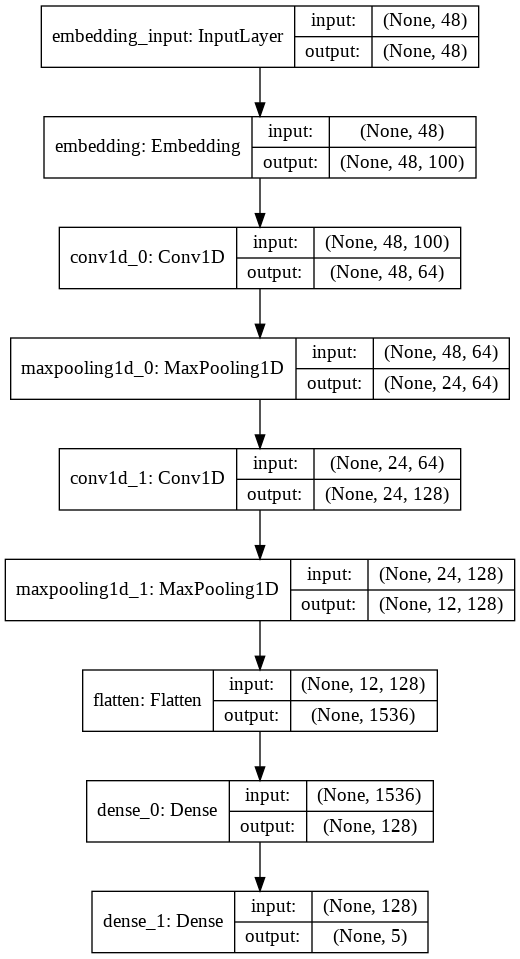

In [0]:
plot_model(model, 'Base Model.png',show_shapes=True)

In [0]:
checkpoint = ModelCheckpoint('base_model.{epoch:02d}-{val_f1:.5f}.h5', 
                             monitor='val_f1', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='max', period=1)

history=model.fit(x_train,y_train,batch_size=128, callbacks=[checkpoint], 
                  validation_data=(x_test,y_test), epochs=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 355595 samples, validate on 46818 samples
Epoch 1/50





355595/355595 [==============================] - 31s 86us/step - loss: 0.7947 - acc: 0.6755 - recall: 0.5889 - precision: 0.7221 - f1: 0.6399 - val_loss: 1.0310 - val_acc: 0.6088 - val_recall: 0.5798 - val_precision: 0.6225 - val_f1: 0.6003

Epoch 00001: val_f1 improved from -inf to 0.60027, saving model to base_model.01-0.60027.h5
Epoch 2/50
355595/355595 [==============================] - 16s 45us/step - loss: 0.4952 - acc: 0.8159 - recall: 0.7968 - precision: 0.8315 - f1: 0.8137 - val_loss: 1.1115 - val_acc: 0.6196 - val_recall: 0.5950 - val_precision: 0.6321 - val_f1: 0.6129

Epoch 00002: val_f1 improved from 0.60027 to 0.61289, saving model to base_model.02-0.61289.h5
Epoch 3/50
355595/355595 [==============================] - 16s 46us/step - loss: 0.3858 - acc: 0.8618 - recall: 0.8505 - precision: 0.8721 - f1: 0.8611 -

In [0]:
#from keras.models import load_model
#dependencies = {
#     'recall': recall,
#     'precision': precision,
#     'f1':f1
#}

#model = load_model('model path', custom_objects=dependencies)
#model.evaluate(x_test, y_test, verbose=1)

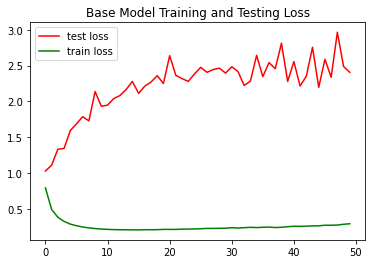

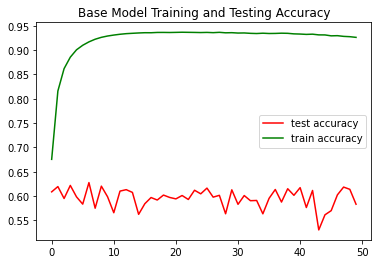

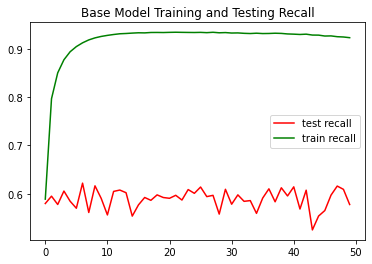

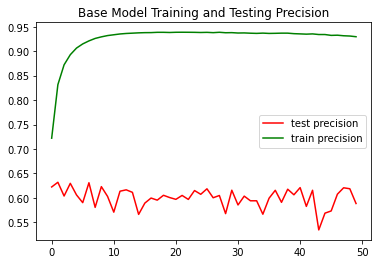

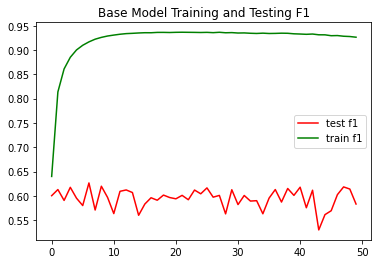

In [0]:
epochs=history.params['epochs']

import matplotlib.pyplot as plt
x=range(epochs)
test_loss=history.history['val_loss']
train_loss=history.history['loss']
test_acc=history.history['val_acc']
train_acc=history.history['acc']
test_recall=history.history['val_recall']
train_recall=history.history['recall']
test_precision=history.history['val_precision']
train_precision=history.history['precision']
test_f1=history.history['val_f1']
train_f1=history.history['f1']

plt.plot(x, test_loss,'r')
plt.plot(x, train_loss,'g')
plt.title('Base Model Training and Testing Loss')
plt.legend(['test loss', 'train loss'])

plt.figure()
plt.plot(x, test_acc, 'r')
plt.plot(x, train_acc, 'g')
plt.title('Base Model Training and Testing Accuracy')
plt.legend(['test accuracy', 'train accuracy'])

plt.figure()
plt.plot(x, test_recall, 'r')
plt.plot(x, train_recall, 'g')
plt.title('Base Model Training and Testing Recall')
plt.legend(['test recall', 'train recall'])

plt.figure()
plt.plot(x, test_precision, 'r')
plt.plot(x, train_precision, 'g')
plt.title('Base Model Training and Testing Precision')
plt.legend(['test precision', 'train precision'])

plt.figure()
plt.plot(x, test_f1, 'r')
plt.plot(x, train_f1, 'g')
plt.title('Base Model Training and Testing F1')
plt.legend(['test f1', 'train f1'])

#non-trainable glove

In [0]:
model1=Sequential(name='Non-trainable glove')
model1.add(Embedding(num_unique_words, EMBEDDING_DIM, weights=[embedding_matrix],
                   trainable=False, input_length=max_phrase_length,name='embedding'))
model1.add(Conv1D(64, 3, padding='same', activation='relu', name='conv1d_0'))
model1.add(MaxPooling1D(2, name='maxpooling1d_0'))
model1.add(Conv1D(128, 3, padding='same', activation='relu', name='conv1d_1'))
model1.add(MaxPooling1D(2, name='maxpooling1d_1'))
model1.add(Flatten(name='flatten'))
model1.add(Dense(128, activation='relu', name='dense_0'))
model1.add(Dense(5, activation='softmax', name='dense_1'))

model1.compile(optimizer='RMSprop', 
              loss='categorical_crossentropy',
              metrics=['acc', recall, precision, f1])

In [0]:
model1.summary()

Model: "Non-trainable glove"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 48, 100)           1372300   
_________________________________________________________________
conv1d_0 (Conv1D)            (None, 48, 64)            19264     
_________________________________________________________________
maxpooling1d_0 (MaxPooling1D (None, 24, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 24, 128)           24704     
_________________________________________________________________
maxpooling1d_1 (MaxPooling1D (None, 12, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense_0 (Dense)              (None, 128)       

In [0]:
checkpoint1 = ModelCheckpoint('non_glove_model.{epoch:02d}-{val_f1:.5f}.h5', 
                             monitor='val_f1', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='max', period=1)

history1=model1.fit(x_train,y_train,batch_size=128, validation_data=(x_test,y_test),
                  callbacks=[checkpoint1], epochs=50)

Train on 355595 samples, validate on 46818 samples
Epoch 1/50
355595/355595 [==============================] - 15s 42us/step - loss: 1.1472 - acc: 0.5156 - recall: 0.2926 - precision: 0.6793 - f1: 0.3930 - val_loss: 1.6597 - val_acc: 0.3453 - val_recall: 0.1662 - val_precision: 0.3332 - val_f1: 0.2214

Epoch 00001: val_f1 improved from -inf to 0.22138, saving model to non_glove_model.01-0.22138.h5
Epoch 2/50
355595/355595 [==============================] - 14s 39us/step - loss: 0.8082 - acc: 0.6709 - recall: 0.5481 - precision: 0.7681 - f1: 0.6389 - val_loss: 1.4484 - val_acc: 0.4293 - val_recall: 0.2739 - val_precision: 0.4382 - val_f1: 0.3367

Epoch 00002: val_f1 improved from 0.22138 to 0.33673, saving model to non_glove_model.02-0.33673.h5
Epoch 3/50
355595/355595 [==============================] - 14s 39us/step - loss: 0.6853 - acc: 0.7236 - recall: 0.6351 - precision: 0.7964 - f1: 0.7062 - val_loss: 1.6276 - val_acc: 0.3977 - val_recall: 0.2792 - val_precision: 0.3957 - val_f1: 0

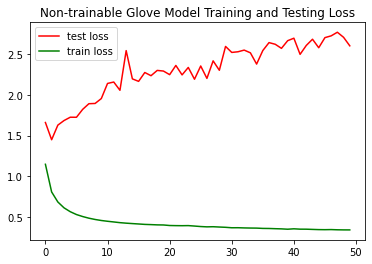

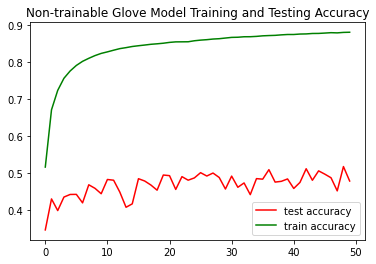

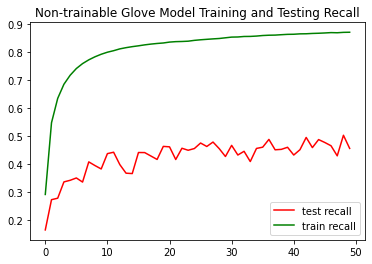

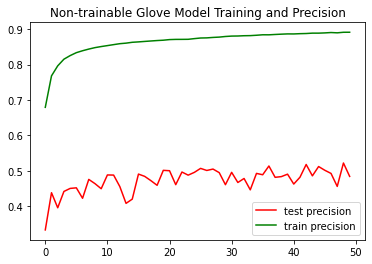

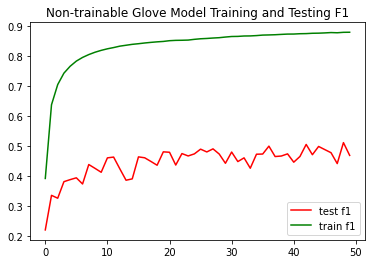

In [0]:
epochs=history1.params['epochs']

x=range(epochs)
test_loss=history1.history['val_loss']
train_loss=history1.history['loss']
test_acc=history1.history['val_acc']
train_acc=history1.history['acc']
test_recall=history1.history['val_recall']
train_recall=history1.history['recall']
test_precision=history1.history['val_precision']
train_precision=history1.history['precision']
test_f1=history1.history['val_f1']
train_f1=history1.history['f1']

plt.plot(x, test_loss,'r')
plt.plot(x, train_loss,'g')
plt.title('Non-trainable Glove Model Training and Testing Loss')
plt.legend(['test loss', 'train loss'])

plt.figure()
plt.plot(x, test_acc, 'r')
plt.plot(x, train_acc, 'g')
plt.title('Non-trainable Glove Model Training and Testing Accuracy')
plt.legend(['test accuracy', 'train accuracy'])

plt.figure()
plt.plot(x, test_recall, 'r')
plt.plot(x, train_recall, 'g')
plt.title('Non-trainable Glove Model Training and Testing Recall')
plt.legend(['test recall', 'train recall'])

plt.figure()
plt.plot(x, test_precision, 'r')
plt.plot(x, train_precision, 'g')
plt.title('Non-trainable Glove Model Training and Precision')
plt.legend(['test precision', 'train precision'])

plt.figure()
plt.plot(x, test_f1, 'r')
plt.plot(x, train_f1, 'g')
plt.title('Non-trainable Glove Model Training and Testing F1')
plt.legend(['test f1', 'train f1'])

#trainable glove

In [0]:
model2=Sequential(name='Trainable glove')
model2.add(Embedding(num_unique_words, EMBEDDING_DIM, weights=[embedding_matrix],
                   trainable=True, input_length=max_phrase_length,name='embedding'))
model2.add(Conv1D(64, 3, padding='same', activation='relu', name='conv1d_0'))
model2.add(MaxPooling1D(2, name='maxpooling1d_0'))
model2.add(Conv1D(128, 3, padding='same', activation='relu', name='conv1d_1'))
model2.add(MaxPooling1D(2, name='maxpooling1d_1'))
model2.add(Flatten(name='flatten'))
model2.add(Dense(128, activation='relu', name='dense_0'))
model2.add(Dense(5, activation='softmax', name='dense_1'))

model2.compile(optimizer='RMSprop', 
              loss='categorical_crossentropy',
              metrics=['acc', recall, precision, f1])

In [0]:
model2.summary()

Model: "Trainable glove"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 48, 100)           1372300   
_________________________________________________________________
conv1d_0 (Conv1D)            (None, 48, 64)            19264     
_________________________________________________________________
maxpooling1d_0 (MaxPooling1D (None, 24, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 24, 128)           24704     
_________________________________________________________________
maxpooling1d_1 (MaxPooling1D (None, 12, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense_0 (Dense)              (None, 128)           

In [0]:
checkpoint2 = ModelCheckpoint('glove_model.{epoch:02d}-{val_f1:.5f}.h5', 
                             monitor='val_f1', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='max', period=1)

history2=model2.fit(x_train,y_train,batch_size=128, validation_data=(x_test,y_test),
                  callbacks=[checkpoint2], epochs=50)

Train on 355595 samples, validate on 46818 samples
Epoch 1/50
355595/355595 [==============================] - 16s 45us/step - loss: 0.9486 - acc: 0.6041 - recall: 0.4491 - precision: 0.6985 - f1: 0.5271 - val_loss: 1.1788 - val_acc: 0.5095 - val_recall: 0.3853 - val_precision: 0.5286 - val_f1: 0.4454

Epoch 00001: val_f1 improved from -inf to 0.44537, saving model to glove_model.01-0.44537.h5
Epoch 2/50
355595/355595 [==============================] - 15s 44us/step - loss: 0.5696 - acc: 0.7768 - recall: 0.7382 - precision: 0.8057 - f1: 0.7703 - val_loss: 1.2827 - val_acc: 0.5529 - val_recall: 0.5056 - val_precision: 0.5639 - val_f1: 0.5330

Epoch 00002: val_f1 improved from 0.44537 to 0.53302, saving model to glove_model.02-0.53302.h5
Epoch 3/50
355595/355595 [==============================] - 15s 43us/step - loss: 0.4516 - acc: 0.8294 - recall: 0.8098 - precision: 0.8452 - f1: 0.8271 - val_loss: 1.2729 - val_acc: 0.5535 - val_recall: 0.5141 - val_precision: 0.5658 - val_f1: 0.5386

E

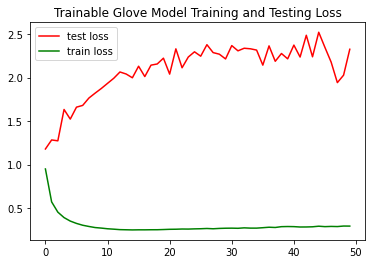

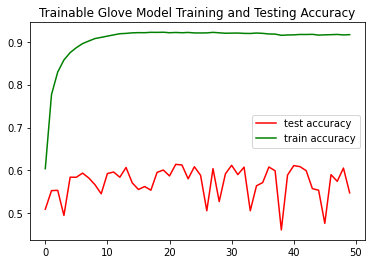

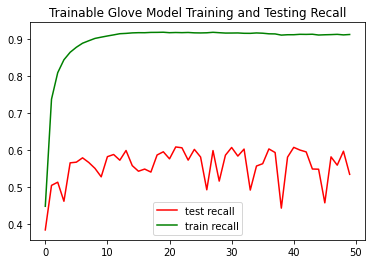

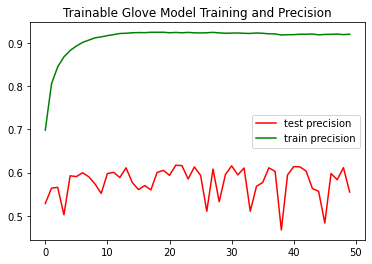

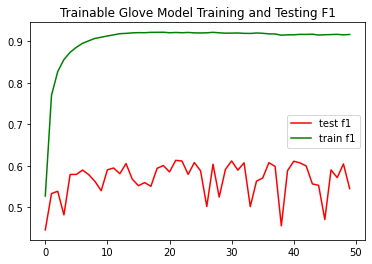

In [0]:
epochs=history2.params['epochs']

x=range(epochs)
test_loss=history2.history['val_loss']
train_loss=history2.history['loss']
test_acc=history2.history['val_acc']
train_acc=history2.history['acc']
test_recall=history2.history['val_recall']
train_recall=history2.history['recall']
test_precision=history2.history['val_precision']
train_precision=history2.history['precision']
test_f1=history2.history['val_f1']
train_f1=history2.history['f1']

plt.plot(x, test_loss,'r')
plt.plot(x, train_loss,'g')
plt.title('Trainable Glove Model Training and Testing Loss')
plt.legend(['test loss', 'train loss'])

plt.figure()
plt.plot(x, test_acc, 'r')
plt.plot(x, train_acc, 'g')
plt.title('Trainable Glove Model Training and Testing Accuracy')
plt.legend(['test accuracy', 'train accuracy'])

plt.figure()
plt.plot(x, test_recall, 'r')
plt.plot(x, train_recall, 'g')
plt.title('Trainable Glove Model Training and Testing Recall')
plt.legend(['test recall', 'train recall'])

plt.figure()
plt.plot(x, test_precision, 'r')
plt.plot(x, train_precision, 'g')
plt.title('Trainable Glove Model Training and Precision')
plt.legend(['test precision', 'train precision'])

plt.figure()
plt.plot(x, test_f1, 'r')
plt.plot(x, train_f1, 'g')
plt.title('Trainable Glove Model Training and Testing F1')
plt.legend(['test f1', 'train f1'])

#deep conv

In [0]:
model3=Sequential(name='Deep Model')
model3.add(Embedding(num_unique_words, 100, input_length=max_phrase_length,name='embedding'))
model3.add(Conv1D(128, 3, padding='same', activation='relu', name='conv1d_0'))
model3.add(Conv1D(128, 3, padding='same', activation='relu', name='conv1d_1'))
model3.add(MaxPooling1D(2, name='maxpooling1d_0'))
model3.add(Conv1D(256, 3, padding='same', activation='relu', name='conv1d_2'))
model3.add(Conv1D(256, 3, padding='same', activation='relu', name='conv1d_3'))
model3.add(MaxPooling1D(2, name='maxpooling1d_1'))
model3.add(Flatten(name='flatten'))
model3.add(Dense(1024, activation='relu', name='dense_0'))
model3.add(Dense(5, activation='softmax', name='dense_1'))

model3.compile(optimizer='RMSprop', 
              loss='categorical_crossentropy',
              metrics=['acc', recall, precision, f1])

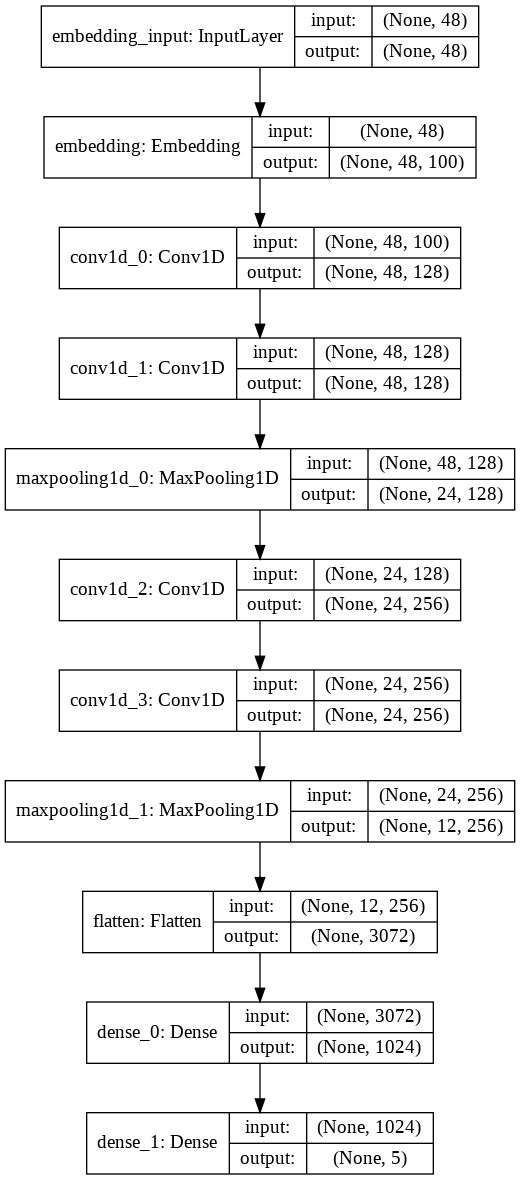

In [0]:
plot_model(model3, 'Deep Model.png',show_shapes=True)

In [0]:
checkpoint3 = ModelCheckpoint('deep_model.{epoch:02d}-{val_f1:.5f}.h5', 
                             monitor='val_f1', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='max', period=1)

history3=model3.fit(x_train,y_train,batch_size=128, callbacks=[checkpoint3], 
                  validation_data=(x_test,y_test), epochs=50)

Train on 355595 samples, validate on 46818 samples
Epoch 1/50
355595/355595 [==============================] - 32s 91us/step - loss: 0.8144 - acc: 0.6662 - recall: 0.5771 - precision: 0.7191 - f1: 0.6271 - val_loss: 1.1063 - val_acc: 0.5836 - val_recall: 0.5418 - val_precision: 0.6049 - val_f1: 0.5714

Epoch 00001: val_f1 improved from -inf to 0.57144, saving model to deep_model.01-0.57144.h5
Epoch 2/50
355595/355595 [==============================] - 31s 88us/step - loss: 0.5009 - acc: 0.8147 - recall: 0.7959 - precision: 0.8302 - f1: 0.8126 - val_loss: 1.2722 - val_acc: 0.5774 - val_recall: 0.5558 - val_precision: 0.5866 - val_f1: 0.5707

Epoch 00002: val_f1 did not improve from 0.57144
Epoch 3/50
355595/355595 [==============================] - 31s 87us/step - loss: 0.4147 - acc: 0.8546 - recall: 0.8428 - precision: 0.8656 - f1: 0.8540 - val_loss: 1.2892 - val_acc: 0.5932 - val_recall: 0.5695 - val_precision: 0.6058 - val_f1: 0.5870

Epoch 00003: val_f1 improved from 0.57144 to 0.58

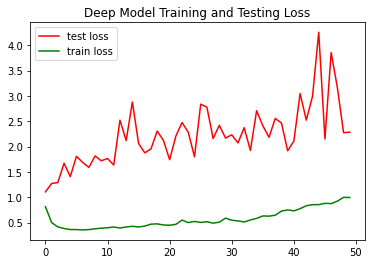

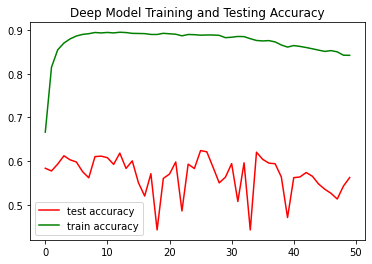

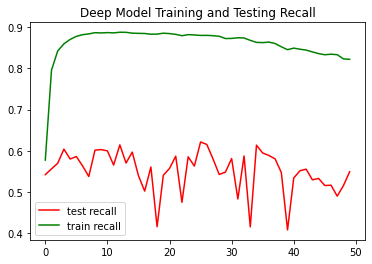

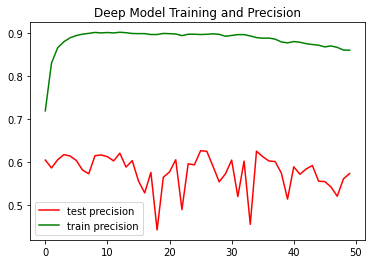

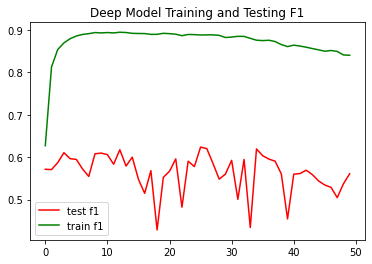

In [0]:
epochs=history3.params['epochs']

x=range(epochs)
test_loss=history3.history['val_loss']
train_loss=history3.history['loss']
test_acc=history3.history['val_acc']
train_acc=history3.history['acc']
test_recall=history3.history['val_recall']
train_recall=history3.history['recall']
test_precision=history3.history['val_precision']
train_precision=history3.history['precision']
test_f1=history3.history['val_f1']
train_f1=history3.history['f1']

plt.plot(x, test_loss,'r')
plt.plot(x, train_loss,'g')
plt.title('Deep Model Training and Testing Loss')
plt.legend(['test loss', 'train loss'])

plt.figure()
plt.plot(x, test_acc, 'r')
plt.plot(x, train_acc, 'g')
plt.title('Deep Model Training and Testing Accuracy')
plt.legend(['test accuracy', 'train accuracy'])

plt.figure()
plt.plot(x, test_recall, 'r')
plt.plot(x, train_recall, 'g')
plt.title('Deep Model Training and Testing Recall')
plt.legend(['test recall', 'train recall'])

plt.figure()
plt.plot(x, test_precision, 'r')
plt.plot(x, train_precision, 'g')
plt.title('Deep Model Training and Precision')
plt.legend(['test precision', 'train precision'])

plt.figure()
plt.plot(x, test_f1, 'r')
plt.plot(x, train_f1, 'g')
plt.title('Deep Model Training and Testing F1')
plt.legend(['test f1', 'train f1'])

#model comparison

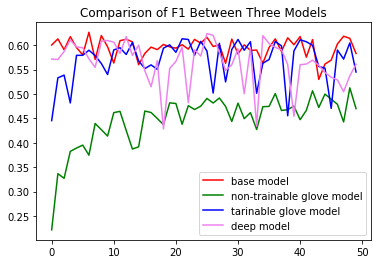

In [0]:
x=range(epochs)

base_f1=history.history['val_f1']
non_trainable_f1=history1.history['val_f1']
tarinable_f1=history2.history['val_f1']
deep_f1=history3.history['val_f1']

plt.figure()
plt.plot(x, base_f1,'r')
plt.plot(x, non_trainable_f1,'g')
plt.plot(x, tarinable_f1,'b')
plt.plot(x, deep_f1,'violet')
plt.title('Comparison of F1 Between Three Models')
plt.legend(['base model','non-trainable glove model', 'tarinable glove model', 
            'deep model' ])